In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# Objetivo: Vamos a crear la conexión con BigQuery y vamos a leer mediante
# consulta SQL desde Python.
# Generamos conexion a bigquery
from google.oauth2 import service_account # para generar conexion
bq_cred = service_account.Credentials.from_service_account_file('cedar-pottery-388916-edca8400ae77.json')        

In [14]:
query = """
    SELECT b.business_id, b.name, b.state, b.categories, r.text, r.date
    FROM `cedar-pottery-388916.conjunto_2.yelp_business` AS b
    JOIN `cedar-pottery-388916.conjunto_2.yelp_reviews` AS r
    ON b.business_id = r.business_id
    LIMIT 500000
"""

#Dialect standard: para usar BigQuery’s standard SQL dialect
yelp_ML_mood = pd.read_gbq(query, project_id='cedar-pottery-388916', credentials =
bq_cred, dialect='standard')
yelp_ML_mood = yelp_ML_mood.dropna(subset=['text','categories','date'])

In [17]:
import pandas as pd

# Convertir la columna "date" a tipo datetime
yelp_ML_mood['date'] = pd.to_datetime(yelp_ML_mood['date'])

# Obtener la columna "time" en formato YYYY-MM-DD
yelp_ML_mood['time'] = yelp_ML_mood['date'].dt.strftime('%Y-%m-%d')

# Obtener la columna "Hour" en formato HH:MM:SS
yelp_ML_mood['Hour'] = yelp_ML_mood['date'].dt.strftime('%H:%M:%S')

# Eliminar la columna original 'date' si ya no es necesaria
yelp_ML_mood = yelp_ML_mood.drop(columns=['date'])

In [18]:
last_column_name_1 = yelp_ML_mood.columns[-2]
last_column_name_2 = yelp_ML_mood.columns[-1]

# Extrae las últimas dos columnas del DataFrame
last_column_1 = yelp_ML_mood[last_column_name_1]
last_column_2 = yelp_ML_mood[last_column_name_2]

# Elimina las últimas dos columnas del DataFrame
yelp_ML_mood = yelp_ML_mood.drop(columns=[last_column_name_1, last_column_name_2])

# Inserta las columnas extraídas en las posiciones 2 y 3 del DataFrame
yelp_ML_mood.insert(2, last_column_name_1, last_column_1)
yelp_ML_mood.insert(3, last_column_name_2, last_column_2)

In [20]:
lista_resultante = ['Acne Treatment', 'Aestheticians', 'Art Restoration', 'Artificial Turf', 'Barbers', 'Beauty & Spas', 'Boudoir Photography', 'Body Contouring', 'Body Shops', 'Chiropractors', 'Clothing Rental', 'Cosmetic Dentists', 'Cosmetic Surgeons', 'Cosmetics & Beauty Supply', 'Cosmetology Schools', 'Costume', 'Country Dance Halls', 'Creperies', 'Cryotherapy', 'Customized Merchandise', 'Dance Studios', 'Dance Wear', 'Day Spas', 'Delicatessen', 'Dermatologists', 'Dietitians', 'Dim Sum', 'Dry Cleaning', 'Dry Cleaning & Laundry', 'Ear Nose & Throat', 'Editorial Services', 'Egyptian', 'Electrolysis Hair Removal', 'Embroidery & Crochet', 'Estheticians', 'Eyebrow Services', 'Eyelash Service', 'Eyewear & Opticians', 'Face Painting', 'Facial Rejuvenation', 'Family Practice', 'Fashion', 'Fitness & Instruction', 'Fitness/Exercise Equipment', 'Florists', 'Flowers & Gifts', 'Formal Wear', 'French', 'General Dentistry', 'Glass & Mirrors', 'Greek', 'Hair Extensions', 'Hair Loss Centers', 'Hair Removal', 'Hair Salons', 'Hair Stylists',  'Hats', 'Henna Artists', 'Holistic Animal Care', 'Beauty Salons', 'Cosmetics & Beauty Supply', 'Day Spas', 'Eyebrow Services', 'Eyelash Service', 'Hair Removal', 'Hair Salons', 'Makeup Artists', 'Massage', 'Medical Spas', 'Nail Salons', 'Perfume', 'Skin Care', 'Tanning Salons', 'Tattoo', 'Waxing', 'Nail Salons', 'Nail Technicians', 'Naturopathic/Holistic', 'Nutritionists', 'Hair Salons', 'Hair Extensions', 'Hair Removal', 'Hair Stylists', 'Hair Loss Centers', 'Makeup Artists', 'Cosmetics & Beauty Supply', 'Skin Care', 'Day Spas', 'Medical Spas', 'Tanning', 'Tattoo', 'Piercing', 'Barbers', 'Massage Therapy', 'Massage', 'Eyebrow Services', 'Eyelash Service', 'Waxing', 'Hair Replacement', 'Wigs', 'Perfume', 'Beauty Supply', 'Acupuncture', 'Chiropractors', 'Reflexology', 'Permanent Makeup', 'Tattoo Removal', 'Weight Loss Centers', 'Pilates', 'Dance Studios', 'Fitness & Instruction', 'Gyms', 'Trainers', 'Saunas', 'Meditation Centers', 'Float Spa', 'Cryotherapy', 'Spray Tanning', 'Piercing', 'Medical Spas', 'Medical Aesthetics', 'Medical Foot Care', 'Medical Supplies', 'Medical Transportation', 'Permanent Makeup', 'Perfume', 'Personal Care Services', 'Photographers', 'Photography Classes', 'Photography Stores & Services', 'Physical Therapy', 'Piercing', 'Pilates', 'Plastic Surgeons', 'Skin Care', 'Spray Tanning', 'Sunglasses', 'Surgeons', 'Swimwear', 'Tanning', 'Tanning Beds', 'Tattoo', 'Tattoo Removal', 'Teeth Whitening', 'Traditional Clothing', 'Traffic Ticketing Law', 'Uniforms', 'Video/Film Production', 'Videographers', 'Vintage & Consignment', 'Vitamins & Supplements', 'Waxing', 'Weight Loss Centers', 'Wigs', "Women's Clothing"]

yelp_ML_mood = yelp_ML_mood.dropna(subset=['categories'])
yelp_ML_mood['categories'] = yelp_ML_mood['categories'].str.split(', ').str[0]
yelp_ML_mood = yelp_ML_mood[yelp_ML_mood['categories'].isin(lista_resultante)]

# Eliminar la columna original 'categories'
yelp_ML_mood.drop(columns=["business_id"], inplace=True)

# Restablecer el índice del DataFrame
yelp_ML_mood = yelp_ML_mood.reset_index(drop=True)


In [21]:
def get_sentiment(text):
    try:
        analyzer = SentimentIntensityAnalyzer()
        sentiment_scores = analyzer.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        
        if compound_score > 0:
            return 'Positivo'
        elif compound_score < 0:
            return 'Negativo'
        else:
            return 'Neutral'
    except:
        return 'Error'

# Aplicar el análisis de sentimiento a la columna 'text' y crear la nueva columna 'sentiment'
yelp_ML_mood['sentiment'] = yelp_ML_mood['text'].apply(get_sentiment)
yelp_ML_mood.drop(columns=["text"], inplace=True)

In [10]:
# Obtén el nombre de la última columna del DataFrame
last_column_name = yelp_ML_mood.columns[-1]

# Extrae la última columna del DataFrame
last_column = yelp_ML_mood[last_column_name]

# Elimina la última columna del DataFrame
gmap_ML_mood = yelp_ML_mood.drop(columns=[last_column_name])

# Inserta la columna extraída en la posición 2 del DataFrame
gmap_ML_mood.insert(2, last_column_name, last_column)


In [23]:
yelp_ML_mood.to_csv('yelp_ML_mood.csv', index=False)

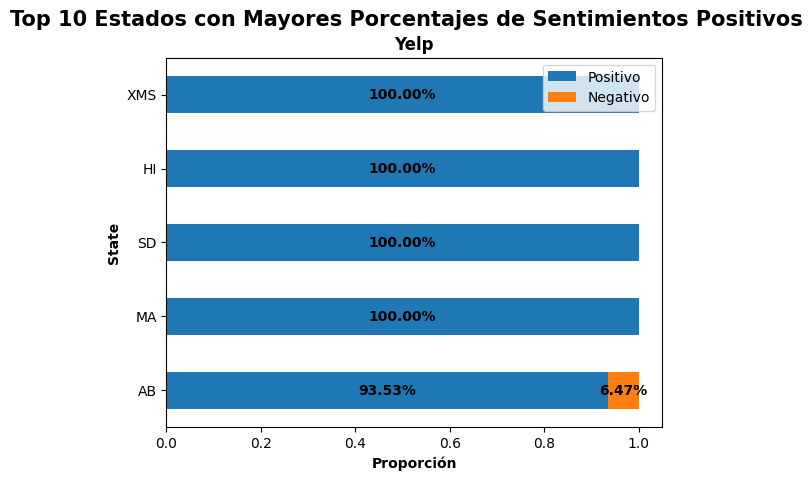

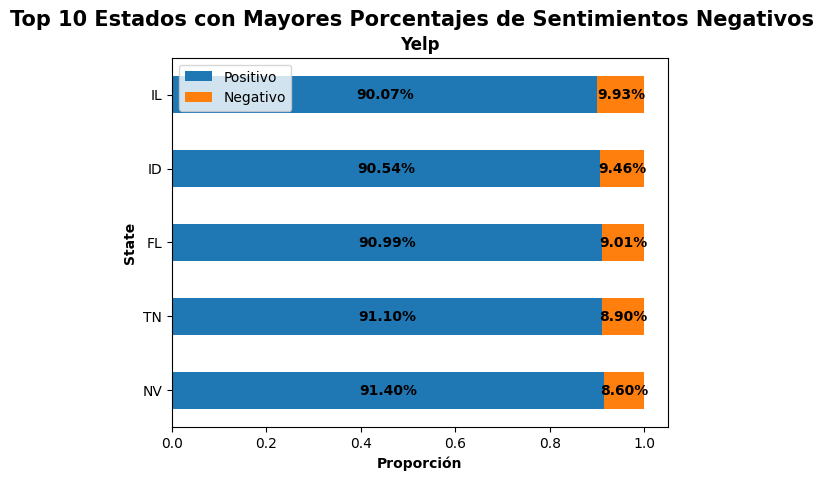

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular el recuento de sentimientos por estado
count_data = yelp_ML_mood.groupby(['state', 'sentiment']).size().unstack().fillna(0)

# Filtrar los estados sin valores
count_data = count_data.loc[count_data.sum(axis=1) > 0]

# Calcular las proporciones de los valores excluyendo la columna "Neutral"
prop_data = count_data[['Positivo', 'Negativo']].div(count_data[['Positivo', 'Negativo']].sum(axis=1), axis=0)

for graf in ["Positivo","Negativo"]:
# Ordenar el DataFrame por la columna 'Positivo' en orden descendente
    prop_data = prop_data.sort_values(by=graf, ascending=False)

# Tomar los primeros 10 estados con mayores porcentajes de sentimientos positivos
    top_10_states = prop_data.head(5)

# Crear el gráfico de barras horizontales con el orden invertido
    ax = top_10_states[::-1].plot(kind='barh', stacked=True)

# Configurar etiquetas y título
    plt.xlabel('Proporción', fontweight="bold")
    plt.ylabel('State', fontweight="bold")
    if graf == "Positivo":
        plt.suptitle('Top 10 Estados con Mayores Porcentajes de Sentimientos Positivos',fontsize=15,fontweight="bold")
        plt.title('Yelp',fontweight="bold")
    else:
        plt.suptitle('Top 10 Estados con Mayores Porcentajes de Sentimientos Negativos',fontsize=15,fontweight="bold")
        plt.title('Yelp',fontweight="bold")

# Mostrar la leyenda
    plt.legend()

# Agregar etiquetas en cada barra
    for rect in ax.patches:
        width = rect.get_width()
        label_text = f"{width:.2%}"  # Convertir el ancho a porcentaje con 2 decimales
        if width > 0:  # Verificar si el ancho es mayor que 0
            ax.text(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2, label_text,
                    ha='center', va='center', color='black', fontweight="bold")

# Mostrar el gráfico
plt.show()


In [52]:
yelp_ML_mood.rename(columns={"name": "Nombre_Local", 
                             "Hour": "Hora",
                             "sentiment": "Sentimiento",
                             "time": "Fecha",
                             "categories": "Servicio",
                             "state": "Estado"
                             }, inplace=True)

yelp_ML_mood

,Nombre_Local,Fecha,Hora,Estado,Servicio,Sentimiento
0,Bloom Salon & Beauty Bar,2020-10-01,17:22:53,XMS,Hair Stylists,Positivo
1,Raed's Hair & All,2019-04-14,11:14:12,MA,Beauty & Spas,Positivo
2,Raed's Hair & All,2016-01-17,22:06:50,MA,Beauty & Spas,Positivo
3,Omkara Tattoo,2018-07-20,03:11:41,HI,Tattoo,Positivo
4,Absolute Dental,2017-06-20,17:17:51,SD,General Dentistry,Positivo
...,...,...,...,...,...,...
30816,Salon U,2017-12-01,21:19:25,TN,Hair Salons,Positivo
30817,Milano Nails Salon,2019-06-15,00:18:04,TN,Nail Salons,Positivo
30818,Phoebus Tattoos Studio,2018-01-21,21:37:28,TN,Beauty & Spas,Positivo
30819,Thread Bar,2018-07-18,01:23:00,TN,Henna Artists,Positivo
